In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import numpy as np

In [2]:
import statsmodels.formula.api as smf

In [3]:
# generate a random dataset with two variables
df = pd.DataFrame(np.random.normal(0, 1, (100, 2)))
df.columns = ['x', 'y']

In [4]:
df.head()

,x,y
0,0.590904,-1.502336
1,0.215687,1.652102
2,0.460612,-0.089260
3,1.648813,0.486073
4,-1.563885,0.848909


In [5]:
# develop a linear regression model (for comparison)
x = df['x']
y = df['y']
fit = np.polyfit(x, y, deg=1)
_x = np.linspace(x.min(), x.max(), num=len(y))
 
# develop the quantile regression model for six quantiles
model = smf.quantreg('y ~ x', df)
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]
fits = [model.fit(q=q) for q in quantiles]

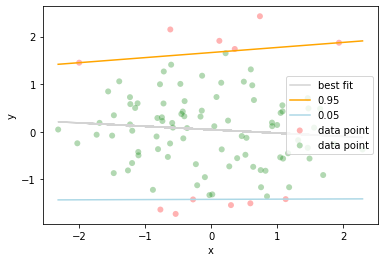

In [6]:
# the quantile lines
_y_005 = fits[0].params['x'] * _x + fits[0].params['Intercept']
_y_095 = fits[5].params['x'] * _x + fits[5].params['Intercept']
 
# start and end coordinates of the quantile lines
p = np.column_stack((x, y))
a = np.array([_x[0], _y_005[0]]) #first point of 0.05 quantile fit line
b = np.array([_x[-1], _y_005[-1]]) #last point of 0.05 quantile fit line
a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])
 
#mask for coordinates above 0.95 or below 0.05 quantile lines
mask = lambda p, a, b, a_, b_: (np.cross(p-a, b-a) > 0) | (np.cross(p-a_, b_-a_) < 0)
mask = mask(p, a, b, a_, b_)
 
# generate the plots
figure, axes = plt.subplots()
axes.scatter(x[mask], df['y'][mask], facecolor='r', edgecolor='none', alpha=0.3, label='data point')
axes.scatter(x[~mask], df['y'][~mask], facecolor='g', edgecolor='none', alpha=0.3, label='data point')
axes.plot(x, fit[0] * x + fit[1], label='best fit', c='lightgrey')
axes.plot(_x, _y_095, label=quantiles[5], c='orange')
axes.plot(_x, _y_005, label=quantiles[0], c='lightblue')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()
